<a href="https://colab.research.google.com/github/Mohamed981/Machine-Learning/blob/main/(LDA%26PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Kaggle**

In [ ]:
!pip install -q kaggle

**Upload API Token **

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akram98","key":"0c937412328533cd929081f8c9607116"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-04-30 20:52:11           4012  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2311  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            513  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            233  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

**Install dataset in Datasets folder**

In [ ]:
!mkdir datasets

In [ ]:
cd datasets

/content/datasets


In [ ]:
!kaggle datasets download -d kasikrit/att-database-of-faces

  0% 0.00/3.61M [00:00<?, ?B/s]
100% 3.61M/3.61M [00:00<00:00, 59.1MB/s]


In [ ]:
!unzip att-database-of-faces.zip

Archive:  att-database-of-faces.zip
  inflating: README                  
  inflating: s1/1.pgm                
  inflating: s1/10.pgm               
  inflating: s1/2.pgm                
  inflating: s1/3.pgm                
  inflating: s1/4.pgm                
  inflating: s1/5.pgm                
  inflating: s1/6.pgm                
  inflating: s1/7.pgm                
  inflating: s1/8.pgm                
  inflating: s1/9.pgm                
  inflating: s10/1.pgm               
  inflating: s10/10.pgm              
  inflating: s10/2.pgm               
  inflating: s10/3.pgm               
  inflating: s10/4.pgm               
  inflating: s10/5.pgm               
  inflating: s10/6.pgm               
  inflating: s10/7.pgm               
  inflating: s10/8.pgm               
  inflating: s10/9.pgm               
  inflating: s11/1.pgm               
  inflating: s11/10.pgm              
  inflating: s11/2.pgm               
  inflating: s11/3.pgm               
  inflating: s

**Initializing the data into a matrix 400*10304**

(400, 10304)


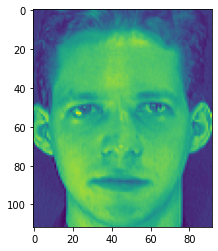

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import itertools


D = np.zeros(shape=(1,10304))  #Data matrix initialization
Y=[]                           #Labels
for i in range(1,41):
  for j in range(1,11):
    Y.append(i)    
    A=np.array([])
    A = imread(f"s{i}/{j}.pgm")
    A=np.reshape(A,[1,A.shape[0]*A.shape[1]])
    D=np.vstack((D,A))
    #D = np.append(D,A, axis=0)
D = np.delete(D, 0, 0)

print(D.shape)

image=imread(f"s1/1.pgm")

plt.imshow(image)
plt.show()


In [ ]:
def Sum_Of_Denominator(eigVals):
  return np.sum(eigVals)

def R(value , limit_of_stop,TotalSum,sum_of_eign_values_until_f_r_greater_than,Initial_r):

    for new_element_in_eign_Value in value:
        sum_of_eign_values_until_f_r_greater_than += new_element_in_eign_Value # Sigma alphas starting with the largest
        Initial_r+=1
        if(sum_of_eign_values_until_f_r_greater_than/TotalSum >=limit_of_stop): # if sum is greater than tolerance
            break # break gives least sum less than tolerance
    return Initial_r

**Splitting the data** 

In [ ]:
D_train=np.zeros(shape=(1,10304))
D_test=np.zeros(shape=(1,10304))
Y_train=[]
Y_test=[]

for i in range(1,401,2):
  Y_train.append(Y[i])
  Y_test.append(Y[i-1])
  D_train=np.vstack((D_train,D[i]))
  D_test=np.vstack((D_test,D[i-1]))
D_train = np.delete(D_train, 0, 0)
D_test = np.delete(D_test, 0, 0)

# PCA

In [ ]:
#PCA
#compute Mean
meanVecs = []
for i in range(10304): # compute mean for each of 10304 column
    meanVecs.append([np.mean(D_train[:,i])])

    meanMat = np.array(meanVecs) # mean matrix 10304 X 1
#Center the Data
zTrain = D_train - meanMat.T # zTrain the mean train matrix
#get the Covarance
covMat = np.cov(zTrain.T) # covariance matrix of zTrain
#get eign Values and Vectors
eigVals,eigVecs = np.linalg.eig(covMat) # eigen values and vectors of covariance MAtrix
# note this takes around 15 minutes

idx = eigVals.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
eigVals = eigVals[idx]
eigVecs = eigVecs[:,idx] 

In [ ]:
with open('eign.npy', 'wb') as f:
    np.save(f, eigVals)
    np.save(f, eigVecs)
with open('eign.npy', 'rb') as f:
    eigvals = np.load(f)
    eigvecs = np.load(f)
print(eigvals)


[ 2.78275844e+06+0.j  2.15255876e+06+0.j  1.07104866e+06+0.j ...
 -6.84003981e-11+0.j -7.05441857e-11+0.j -1.04820827e-10+0.j]


In [ ]:

Alpha = [0.8,0.85,0.9,0.95]
rList = []
Sum_Of_Denominat=Sum_Of_Denominator(eigVals)
for new_Alph in Alpha:
    rList.append(R(eigVals, new_Alph,Sum_Of_Denominat,0,0))
print("list of R "+str(rList))


list of R [37, 53, 77, 116]


In [ ]:

U = [] #list of U for each alpha
U = [eigVecs[:,:i] for i in rList]

trainProjectionMatrices = [] 
testProjectionMatrices = [] 
for mat in U:
    trainProjectionMatrices .append(D_train.dot(mat))
    testProjectionMatrices .append(D_test.dot(mat))



In [ ]:
def eculidenDistance(x , xi):
    d = 0.0
    for i in range(len(x)):
        d += pow(abs(x[i]-xi[i]),2)
    return math.sqrt(d)


def getKey(item):
    return item[1]

def knnPredictor(X,y,Xt,yt,k):

    cnt = 0
    predictedLabels = []
    for i in range(len(Xt)):
        newDataSet = []
        for j in range(len(X)):
            newDataSet.append([j,eculidenDistance(X[j],Xt[i]),y[j]])
            
        newDataSet = sorted(newDataSet,key=getKey)
        dict = {}
        keyOfMaxItem = ''
        for item in itertools.islice(newDataSet , 0, k):
            key = item[2]
            keyOfMaxItem = key
            if key in dict:
                dict[key] = dict[key] + 1
            else:
                dict[key] = 1

        for key in dict:
            if dict[key] >= dict[keyOfMaxItem]:
                keyOfMaxItem = key
        if keyOfMaxItem == yt[i]:
            cnt += 1
      #  print("Predicted class: ", keyOfMaxItem ,dict[keyOfMaxItem] ," - Actual Class: ", yt[i])
        predictedLabels.append(keyOfMaxItem)
    accuracy = (float(cnt)/len(Xt))*100
    
    return predictedLabels,accuracy

In [ ]:
k=1
predictedLabels = []
Acc=0
predictedTestLabels = [] 
AccList = []
for index in range(len(testProjectionMatrices)): 
  predictedLabels,Acc=knnPredictor(trainProjectionMatrices[index],Y_train,testProjectionMatrices[index],Y_test,k)
  predictedTestLabels.append(predictedLabels)
  AccList.append(Acc)
for index in range(len(testProjectionMatrices)): 
  print("labelPredicted when Alpha = "+str(Alpha[index]))    
  print(predictedLabels)
  print("with Accuaracy: "+str(AccList[index]))

labelPredicted when Alpha = 0.8
[16, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 38, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 8, 20, 20, 3, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 30, 31, 32, 32, 32, 2, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 40, 35, 35, 35, 35, 36, 36, 7, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 23, 39, 39, 39, 39, 39, 40, 40, 5, 5, 5]
with Accuaracy: 93.0
labelPredicted when Alpha = 0.85
[16, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 38, 11, 11,

[93.0, 94.0, 94.5, 93.5]


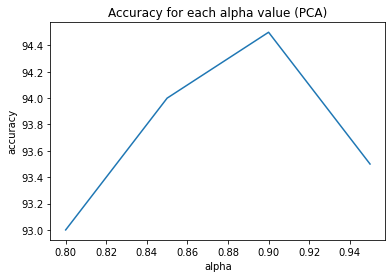

As alpha increases accuracy increase , peak at 0.9


In [ ]:

print(AccList)
plt.plot(Alpha,AccList)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy for each alpha value (PCA)")
plt.show()
print("As alpha increases accuracy increase , peak at 0.9")


In [ ]:
kRange = [1,3,5,7]
predictedLabels = []
Acc=0
predictedTestLabels = [] 
AccList = []
for index in range(len(testProjectionMatrices)): 
  for k in kRange:
    predictedLabels,Acc=knnPredictor(trainProjectionMatrices[index],Y_train,testProjectionMatrices[index],Y_test,k)
    predictedTestLabels.append(predictedLabels)
    AccList.append(Acc)
   

In [ ]:
AccList


array([93. , 83.5, 78. , 73. , 94. , 83.5, 81. , 73.5, 94.5, 84. , 78. ,
       71.5, 93.5, 83.5, 80.5, 71. ])

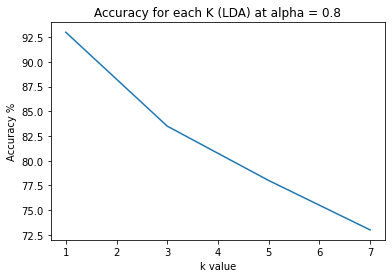

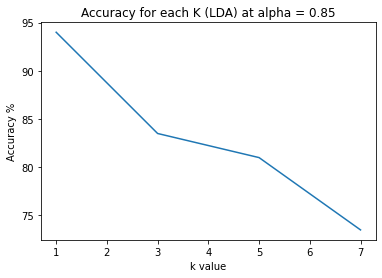

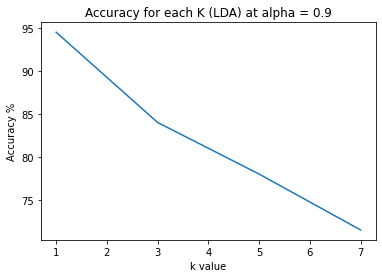

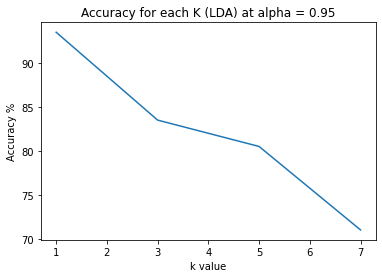

In [ ]:
j=0
for i in range(0,16,4):
  plt.plot(kRange , AccList[i:i+4])
  plt.xlabel("k value")
  plt.ylabel("Accuracy %")
  plt.title("Accuracy for each K (LDA) at alpha = "+str(Alpha[j]))
  j+=1
  plt.show()

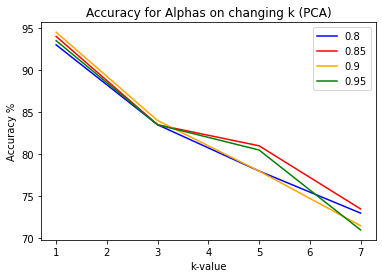

Legend shows alpha values


In [ ]:
index = 0
alphaRange = [0.8,0.85,0.9,0.95]
colors = ['blue','red' , 'orange' ,'green']
for (Alpha,color) in zip(alphaRange,colors):
    plt.plot(kRange,AccList[index:index+4] , color = color , label = Alpha)
    index +=4
    plt.title("Accuracy for Alphas on changing k (PCA)")
    plt.xlabel("k-value")
    plt.ylabel("Accuracy %")
plt.legend(loc='upper right')
plt.show()
print("Legend shows alpha values")


# LDA

In [ ]:
#calculating mean
labels = np.array(Y_train)
meanList = [np.mean(D_train[labels == i] , axis=0) for i in range(1,41)] # list having mean vectors per class
mean = np.mean(D_train , axis = 0) # overall sample mean
print(meanList)
Sb = np.empty((10304,10304), float)
n=200/40
for i in range(40):
    Sk = (meanList[i] - mean).reshape(10304,1) @ (meanList[i] - mean).reshape(1,10304) 
    Sb += Sk
Sb = n*Sb
print(Sb)

[array([48.8, 48. , 40.6, ..., 62.2, 56. , 59.4]), array([35.2, 35.8, 35.6, ..., 71.8, 71.6, 71.6]), array([105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ]), array([118.6, 118.8, 118. , ...,  70.8,  69.4,  69.2]), array([128.8, 129. , 127.8, ...,  72.6,  71.8,  72.8]), array([153.4, 152.8, 152.2, ..., 103.6, 103.8, 103. ]), array([56.6, 57.2, 57.6, ..., 64. , 65. , 65.4]), array([122. , 118.6, 119.8, ...,  59.8,  56.8,  59. ]), array([109.8, 111.4, 110.4, ...,  84. ,  82.4,  83.2]), array([134.2, 130. , 132.6, ...,  26. ,  30.4,  32.4]), array([46.4, 47. , 46.4, ..., 34. , 34. , 37.6]), array([104.6, 106. , 105.4, ...,  38.8,  40.6,  33. ]), array([107.6, 109.2, 108. , ...,  20.6,  25.8,  23.8]), array([ 45.8,  47.2,  46.8, ..., 142.2, 142.6, 123.4]), array([72.4, 72.2, 71.4, ..., 71.8, 49. , 54. ]), array([60. , 59. , 61.4, ..., 64.6, 64.6, 60.4]), array([49.4, 49.6, 51.4, ..., 42.2, 46.8, 46. ]), array([121.2, 120.6, 122.2, ...,  73.6,  74. ,  73.4]), array([49.6, 46.8, 50.4, ..., 37.

In [ ]:
print(meanList)

[array([48.8, 48. , 40.6, ..., 62.2, 56. , 59.4]), array([35.2, 35.8, 35.6, ..., 71.8, 71.6, 71.6]), array([105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ]), array([118.6, 118.8, 118. , ...,  70.8,  69.4,  69.2]), array([128.8, 129. , 127.8, ...,  72.6,  71.8,  72.8]), array([153.4, 152.8, 152.2, ..., 103.6, 103.8, 103. ]), array([56.6, 57.2, 57.6, ..., 64. , 65. , 65.4]), array([122. , 118.6, 119.8, ...,  59.8,  56.8,  59. ]), array([109.8, 111.4, 110.4, ...,  84. ,  82.4,  83.2]), array([134.2, 130. , 132.6, ...,  26. ,  30.4,  32.4]), array([46.4, 47. , 46.4, ..., 34. , 34. , 37.6]), array([104.6, 106. , 105.4, ...,  38.8,  40.6,  33. ]), array([107.6, 109.2, 108. , ...,  20.6,  25.8,  23.8]), array([ 45.8,  47.2,  46.8, ..., 142.2, 142.6, 123.4]), array([72.4, 72.2, 71.4, ..., 71.8, 49. , 54. ]), array([60. , 59. , 61.4, ..., 64.6, 64.6, 60.4]), array([49.4, 49.6, 51.4, ..., 42.2, 46.8, 46. ]), array([121.2, 120.6, 122.2, ...,  73.6,  74. ,  73.4]), array([49.6, 46.8, 50.4, ..., 37.

In [ ]:
Z = [D_train[labels == i] - meanList[i-1] for i in range(1,41)] # list of matricies , each has centralised members of one class only
S = np.empty((10304,10304),float)
print(Z)
for mat in Z :
    Sn = mat.T @ mat
    S += Sn
print(S)

[array([[ 11.2,  12. ,  21.4, ..., -30.2, -22. , -25.4],
       [ 14.2,   5. ,  -5.6, ..., -21.2, -46. , -35.4],
       [ -5.8,   2. ,   0.4, ...,  95.8,  97. , 109.6],
       [ -4.8,  -5. ,  -8.6, ..., -19.2, -13. , -22.4],
       [-14.8, -14. ,  -7.6, ..., -25.2, -16. , -26.4]]), array([[  1.8,  -0.8,  -0.6, ..., -45.8, -43.6, -43.6],
       [ -1.2,   0.2,  -0.6, ..., -39.8, -46.6, -46.6],
       [ -1.2,  -0.8,  -0.6, ..., -40.8, -47.6, -47.6],
       [ -1.2,   3.2,  -0.6, ...,  63.2,  66.4,  76.4],
       [  1.8,  -1.8,   2.4, ...,  63.2,  71.4,  61.4]]), array([[ -5.2,  -5. ,   0.6, ...,  -6. ,  -6.4,  -6. ],
       [ -0.2,  -2. ,   0.6, ...,  -8. , -13.4, -13. ],
       [  4.8,   2. ,   1.6, ...,  -1. ,   4.6,   3. ],
       [  1.8,   0. ,   1.6, ...,   8. ,   7.6,   7. ],
       [ -1.2,   5. ,  -4.4, ...,   7. ,   7.6,   9. ]]), array([[ -2.6,  -6.8,  -3. , ..., -19.8, -14.4, -15.2],
       [  0.4,   2.2,   1. , ...,  11.2,   8.6,  10.8],
       [  2.4,   4.2,   3. , ...,  17.2, 

In [ ]:
Sinv = np.linalg.inv(S)
mat = Sb @ Sinv 
print(mat)

[[ 5.00000000e+00  1.31024080e-11 -9.32232069e-12 ... -6.25000000e-01
   8.18359375e+00  2.40625000e+00]
 [ 7.53175300e-12  5.00000000e+00 -4.20641300e-12 ...  6.56250000e+00
   2.05468750e+00 -6.46875000e+00]
 [ 1.02886588e-11  5.86908300e-12  5.00000000e+00 ...  1.75625000e+01
   8.50585938e-01 -6.21875000e+00]
 ...
 [ 3.78008735e-12  2.27373675e-13  2.41016096e-11 ...  5.98046875e+00
   5.75000000e+00 -1.12812500e+01]
 [ 4.61852778e-12  5.22959454e-12  1.65982783e-11 ... -1.92187500e+00
   5.12500000e+00 -1.20000000e+01]
 [ 4.40536496e-12  9.32232069e-12  2.93312041e-11 ...  1.64257812e+00
   9.50000000e+00  4.18750000e+00]]


In [ ]:
eigValsOfLDA , eigVecsOfLDA = np.linalg.eig(mat)

In [ ]:
with open('eigenLDA.npy', 'wb') as f:
    np.save(f, eigValsOfLDA)
    np.save(f, eigVecsOfLDA)
with open('eigenLDA.npy', 'rb') as f:
    a = np.load(f)
    b = np.load(f)
print(b)

In [ ]:
idx = eigValsOfLDA.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
eigValsOfLDA = eigValsOfLDA[idx]
eigVecsOfLDA = eigVecsOfLDA[:,idx] 
new=[]
new.append(39)
projMat = [] #list of U for each alpha
projMat = [eigVecsOfLDA[:,:i] for i in new]
projMat = eigVecsOfLDA[:,:39]
trainProj2=[]
testProj2=[]
trainProj2 .append(D_train.dot(projMat))
testProj2 .append(D_test.dot(projMat))



In [ ]:
kRange = [1,3,5,7]
predictedLabels = []
Acc=0
predictedTestLabels = [] 
AccList = []
for index in range(len(trainProj2)): 
  for k in kRange:
    
    predictedLabels,Acc=knnPredictor(trainProj2[index],Y_train,testProj2[index],Y_test,k)
    predictedTestLabels.append(predictedLabels)
    AccList.append(Acc)

print(AccList)


In [ ]:

plt.plot(kRange , AccList)
plt.xlabel("k value")
plt.ylabel("Accuracy %")
plt.title("Accuracy for each K (LDA)")
plt.show()

# Non face Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
import sys
import os
from skimage import io

New = np.zeros(shape=(1,10304))  #Data matrix initialization
directory = "/content/drive/MyDrive/Dataset2" #drive path 
dimension=(92,112)
i=0
for j in range(1,21):
  directory = f"/content/drive/MyDrive/Dataset2/{j}" #drive path 
  for filename in os.listdir(directory):
    i+=1
    A = imread(f"{directory}/{filename}")
    A=cv2.resize(A,dimension,interpolation=cv2.INTER_AREA)
    if(len(A.shape)!=2):
      A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
    A=np.reshape(A,[1,A.shape[0]*A.shape[1]])
    New=np.vstack((New,A))
    #D = np.append(D,A, axis=0)
New = np.delete(New, 0, 0)
print(New.shape)



(400, 10304)


In [ ]:

print(New)

[[108.  91.  98. ...  51.  28.  34.]
 [ 23.  39.  69. ...  23.  22.  24.]
 [123. 125. 184. ... 105. 116. 154.]
 ...
 [ 42.  18.  29. ... 101. 119. 133.]
 [111. 111. 111. ...  17.  10.  24.]
 [186.  37.  39. ...   4.  72. 108.]]


In [ ]:
Data_train=np.zeros(shape=(1,10304))
Data_test=np.zeros(shape=(1,10304))
labeled_train=[]
labeled_test=[]

Data_train=np.vstack(New[0:200,:])
#print(Data_train.shape)
Data_train=np.concatenate((Data_train, D_train), axis=0)

#print(Data_train.shape)

labeled_train=np.full((200, 1), 1)
labeled_train=np.concatenate((labeled_train, np.full((200, 1), 2)), axis=0)
print(labeled_train[200])

Data_test=np.vstack(New[200:400,:])
Data_test=np.concatenate((Data_test, D_test), axis=0)

print(Data_test.shape)

labeled_test=np.full((200, 1), 1)
labeled_test=np.concatenate((labeled_test, np.full((200, 1), 2)), axis=0)
print(labeled_test.shape)

#print(Data_train.shape)
#print(Data_test.shape)
#print(Data_test[0])
#print(New[200])


[2]
(400, 10304)
(400, 1)


In [ ]:
#calculating mean
labels = np.array(labeled_train)
x=np.mean(Data_train[0:200,:], axis = 0)
y= np.mean(Data_train[200:400,:], axis = 0)
x=x.reshape(1,10304)
y=y.reshape(1,10304)
meanList= np.concatenate((x,y), axis=0)
#print(meanList.shape)
#print(meanList[1])

mean = np.mean(Data_train , axis = 0) # overall sample mean
print(mean)
Sb = np.empty((10304,10304), float)

Sk = (meanList[1] - meanList[0]).reshape(10304,1) @ (meanList[1] - meanList[0]).reshape(1,10304) 

Sb = Sk
print(Sb)
print(Sb.shape)

[103.3975 103.205  104.565  ...  82.5325  80.48    79.265 ]
[[1336.268025 1339.00965  1418.334    ...  386.934675  449.26095
   430.98345 ]
 [1339.00965  1341.7569   1421.244    ...  387.72855   450.1827
   431.8677  ]
 [1418.334    1421.244    1505.44     ...  410.698     476.852
   457.452   ]
 ...
 [ 386.934675  387.72855   410.698    ...  112.042225  130.08965
   124.79715 ]
 [ 449.26095   450.1827    476.852    ...  130.08965   151.0441
   144.8991  ]
 [ 430.98345   431.8677    457.452    ...  124.79715   144.8991
   139.0041  ]]
(10304, 10304)


In [ ]:

Z1 = Data_train[0:200,:] - meanList[0]
Z2 = Data_train[200:400,:] - meanList[1]


S1 = np.dot(Z1.T,Z1)
S2 = np.dot(Z2.T,Z2)
S = S1+S2

print(S)

[[1308798.995 1236884.44  1224188.765 ...   45429.865   51826.585
   130393.52 ]
 [1236884.44  1303909.5   1222727.27  ...   44436.48    42350.37
   106641.5  ]
 [1224188.765 1222727.27  1313252.31  ...   56436.855   55935.32
   132208.91 ]
 ...
 [  45429.865   44436.48    56436.855 ... 1261863.355 1108703.795
  1042756.84 ]
 [  51826.585   42350.37    55935.32  ... 1108703.795 1146259.43
  1050702.21 ]
 [ 130393.52   106641.5    132208.91  ... 1042756.84  1050702.21
  1127695.5  ]]


In [ ]:

Sinv = np.linalg.inv(S)
print(Sinv)
mat = Sb @ Sinv 
print(mat)

[[ 1.68674750e+07  7.05372597e+07 -9.96229493e+06 ... -2.33081149e+07
  -2.21360719e+07 -1.31071356e+08]
 [ 1.00915378e+08 -3.57223680e+08  1.24874471e+08 ...  2.66163414e+07
   6.25713126e+07  6.27218952e+07]
 [-9.57820888e+07  8.89917129e+08 -1.05161625e+08 ... -6.73495069e+07
  -1.61508810e+08 -9.28865145e+06]
 ...
 [ 4.30720136e+06 -2.55157469e+08  2.36527267e+07 ... -5.80008063e+06
   5.80324008e+07 -4.63102223e+07]
 [-6.81483217e+07  2.93231880e+08 -1.29463407e+08 ... -2.56897532e+07
  -2.50976643e+07 -2.83931238e+07]
 [-6.39884582e+06 -5.68338307e+08  1.01507776e+08 ...  4.90854169e+07
   5.30225936e+07  1.19281316e+07]]
[[ 2.19003546e+11 -2.10872043e+12 -6.23836185e+11 ...  4.17259025e+11
   1.75900534e+11 -8.09019520e+11]
 [ 2.19452876e+11 -2.11304690e+12 -6.25116111e+11 ...  4.18115116e+11
   1.76261430e+11 -8.10679388e+11]
 [ 2.32453497e+11 -2.23822604e+12 -6.62148652e+11 ...  4.42884699e+11
   1.86703343e+11 -8.58704894e+11]
 ...
 [ 6.34154707e+10 -6.10608830e+11 -1.8064029

In [ ]:
eigValsOfLDA , eigVecsOfLDA = np.linalg.eig(mat)

In [ ]:

with open('eigenLDA1.npy', 'rb') as f:
    eigValsOfLDA = np.load(f)
    eigVecsOfLDA = np.load(f)
print(b)

[[ 1.02622908e-02+0.j         -1.10289446e-02+0.j
   4.90319021e-03-0.004482j   ... -1.95591812e-02+0.j
   2.53984310e-02+0.j          2.75928780e-02+0.j        ]
 [ 1.02833460e-02+0.j         -5.42021316e-03+0.j
  -2.90859717e-03-0.00490855j ...  2.21497173e-03+0.j
  -3.09447453e-03+0.j         -3.48945217e-03+0.j        ]
 [ 1.08925423e-02+0.j         -1.21233879e-02+0.j
   1.01969530e-02-0.00513225j ...  9.74315572e-03+0.j
  -7.82301078e-03+0.j         -1.04353047e-02+0.j        ]
 ...
 [ 2.97158660e-03+0.j         -3.18097615e-03+0.j
   2.09877511e-03-0.00115954j ...  3.82266528e-03+0.j
  -5.75275624e-03+0.j         -2.40844224e-03+0.j        ]
 [ 3.45024084e-03+0.j         -3.00517787e-03+0.j
   3.78634143e-04-0.00266623j ...  2.66688645e-02+0.j
  -3.20282385e-03+0.j         -1.73163515e-02+0.j        ]
 [ 3.30987303e-03+0.j         -2.34013734e-03+0.j
  -9.45237362e-04-0.00243421j ...  3.89431831e-03+0.j
   5.53445018e-05+0.j         -3.93981680e-03+0.j        ]]


In [ ]:
facelabels=predictedLabels2[200:400,:]
nonfacelabels=predictedLabels2[0:200,:]

#face in non_face region
faceInNonfaceIdexes = np.where(nonfacelabels == 2)
faceInNonfaceIdexes=faceInNonfaceIdexes[0]
print(faceInNonfaceIdexes)
print(nonfacelabels[10])

#non_face in non_face region
NonfaceInNonfaceIdexes = np.where(nonfacelabels ==1 )
NonfaceInNonfaceIdexes=NonfaceInNonfaceIdexes[0]
print(NonfaceInNonfaceIdexes)

#non_face in face region
NonfaceInfaceIdexes = np.where(facelabels == 1)
NonfaceInfaceIdexes=NonfaceInfaceIdexes[0]+200
print(NonfaceInfaceIdexes)
print(facelabels[167])

#face in face region
faceInfaceIdexes = np.where(facelabels == 2)
faceInfaceIdexes=faceInfaceIdexes[0]+200
print(faceInfaceIdexes)
print(nonfacelabels[10])

In [ ]:
eigValsOfLDA=np.abs(eigValsOfLDA)
idx = eigValsOfLDA.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
eigValsOfLDA = eigValsOfLDA[idx]
eigVecsOfLDA = eigVecsOfLDA[:,idx] 
print(eigVecsOfLDA.shape)
  
projMat = eigVecsOfLDA[:,:120]
trainProj2 = Data_train @ projMat
testProj2 = Data_test @ projMat

#print(trainProj2.shape)

predictedLabels2 = [] # list of predicted labels
for tested in testProj2:
    elementIndex = 0 # index of each element in each trainProj
    nearestIndex = 0
    nearestDistance = float('inf')
    for trained in trainProj2:
        distance = np.linalg.norm(tested-trained)
        if(distance < nearestDistance):
            nearestIndex = elementIndex
            nearestDistance = distance
        elementIndex +=1
    predictedLabels2.append(labeled_test[nearestIndex])

actualLabels = np.array(labeled_test)
predictedLabels2 = np.array(predictedLabels2)
correct = actualLabels.shape[0] - np.count_nonzero(actualLabels-predictedLabels2)
accuracy = correct / actualLabels.shape[0] *100
#print(accuracy)

#print(predictedLabels2[0:200,:])

(10304, 10304)


In [ ]:
facelabels=predictedLabels2[200:400,:]
nonfacelabels=predictedLabels2[0:200,:]

#face in non_face region
faceInNonfaceIdexes = np.where(nonfacelabels == 2)
faceInNonfaceIdexes=faceInNonfaceIdexes[0]
print(faceInNonfaceIdexes)
print(nonfacelabels[10])

#non_face in non_face region
NonfaceInNonfaceIdexes = np.where(nonfacelabels ==1 )
NonfaceInNonfaceIdexes=NonfaceInNonfaceIdexes[0]
print(NonfaceInNonfaceIdexes)

#non_face in face region
NonfaceInfaceIdexes = np.where(facelabels == 1)
NonfaceInfaceIdexes=NonfaceInfaceIdexes[0]+200
print(NonfaceInfaceIdexes)
print(facelabels[167])

#face in face region
faceInfaceIdexes = np.where(facelabels == 2)
faceInfaceIdexes=faceInfaceIdexes[0]+200
print(faceInfaceIdexes)
print(nonfacelabels[10])

[ 10  12  13  26  29  32  44  45  47  49  61  70  72  75 104 105 116 129
 131 137 146 157 162 163 166 183 189 192]
[2]
[  0   1   2   3   4   5   6   7   8   9  11  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  30  31  33  34  35  36  37  38  39  40  41
  42  43  46  48  50  51  52  53  54  55  56  57  58  59  60  62  63  64
  65  66  67  68  69  71  73  74  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 106 107 108 109 110 111 112 113 114 115 117 118 119 120 121 122 123 124
 125 126 127 128 130 132 133 134 135 136 138 139 140 141 142 143 144 145
 147 148 149 150 151 152 153 154 155 156 158 159 160 161 164 165 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 184 185 186 187
 188 190 191 193 194 195 196 197 198 199]
[367 368 381 383]
[1]
[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 2

(28, 10304)


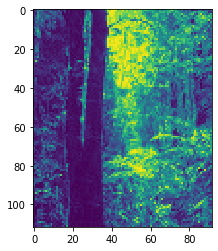

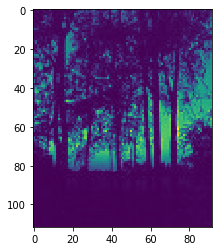

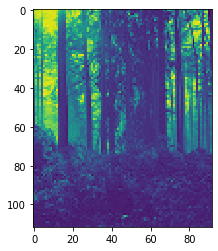

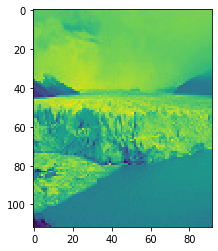

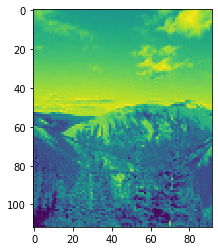

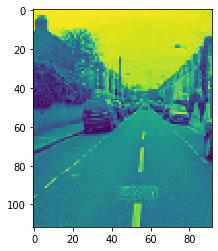

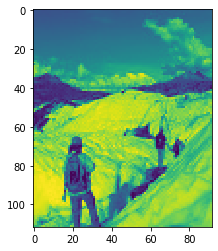

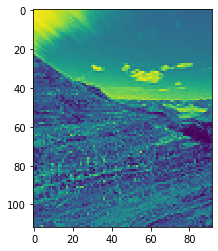

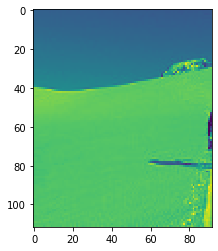

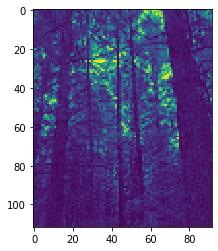

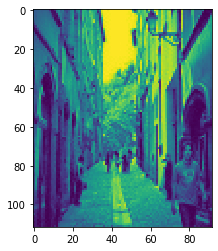

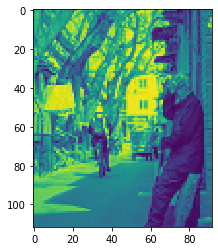

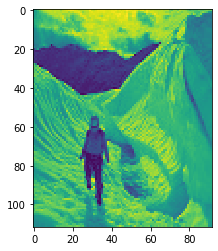

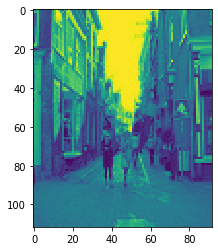

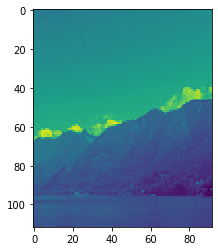

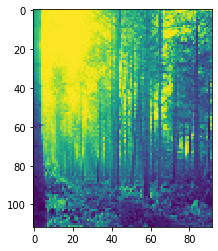

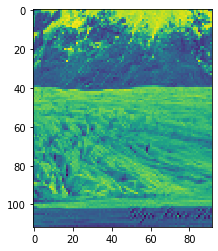

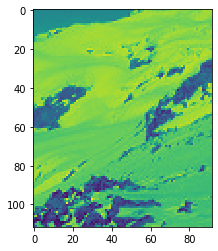

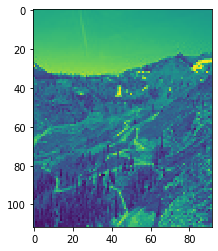

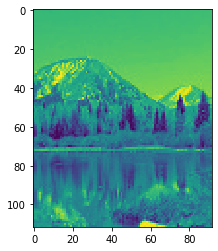

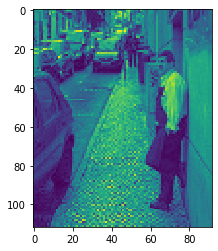

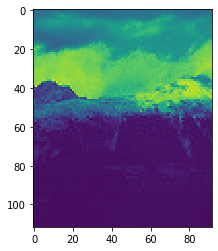

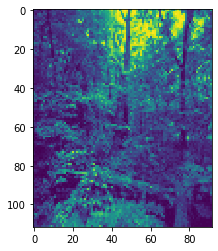

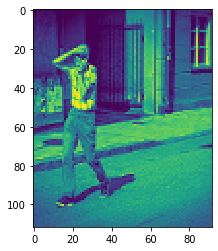

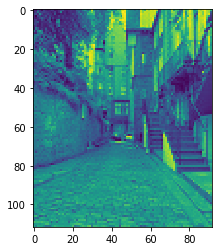

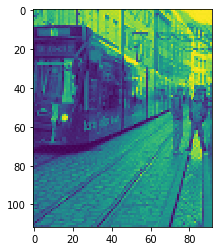

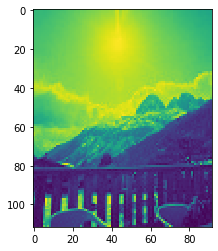

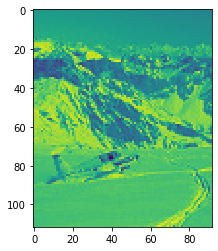

In [ ]:
from matplotlib import pyplot as plt
#false positive
dataOfFaceinNonface=Data_train[faceInNonfaceIdexes]
print(dataOfFaceinNonface.shape)
for i in faceInNonfaceIdexes:
    plt.imshow(Data_train[i].reshape(112,92), interpolation='nearest')
    plt.show()

#print(Data_train[367].reshape(92,112))



(4, 10304)
[367 368 381 383]


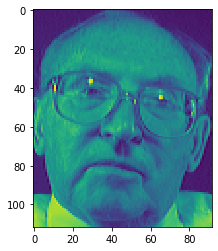

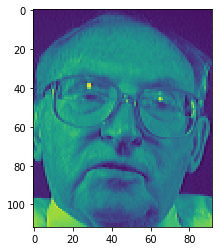

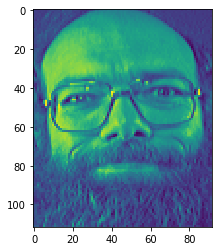

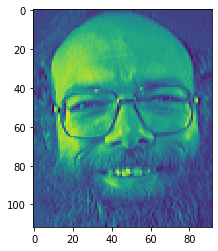

In [ ]:
from matplotlib import pyplot as plt
#false positive
dataOfNonfaceinface=Data_train[NonfaceInfaceIdexes]
print(dataOfNonfaceinface.shape)
print(NonfaceInfaceIdexes)
for i in NonfaceInfaceIdexes:
    plt.imshow(Data_train[i].reshape(112,92), interpolation='nearest')
    plt.show()

In [ ]:

eigValsOfLDA=np.abs(eigValsOfLDA)
idx = eigValsOfLDA.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
eigValsOfLDA = eigValsOfLDA[idx]
eigVecsOfLDA = eigVecsOfLDA[:,idx] 
print(eigValsOfLDA)
acc=[]
jump=20
for i in range(0,10304,jump):
  projMat = eigVecsOfLDA[:,:i]
  trainProj2 = Data_train @ projMat
  testProj2 = Data_test @ projMat

  #print(trainProj2.shape)

  predictedLabels2 = [] # list of predicted labels
  for tested in testProj2:
      elementIndex = 0 # index of each element in each trainProj
      nearestIndex = 0
      nearestDistance = float('inf')
      for trained in trainProj2:
          distance = np.linalg.norm(tested-trained)
          if(distance < nearestDistance):
              nearestIndex = elementIndex
              nearestDistance = distance
          elementIndex +=1
      predictedLabels2.append(labeled_test[nearestIndex])

  actualLabels = np.array(labeled_test)
  predictedLabels2 = np.array(predictedLabels2)
  correct = actualLabels.shape[0] - np.count_nonzero(actualLabels-predictedLabels2)
  accuracy = correct / actualLabels.shape[0] *100
  acc.append(accuracy)
  if len(acc)>1:
      print(acc)
      if np.abs(acc[-1]-acc[-2])<0.0001:
        break
r=np.argmax(acc)
print(r)  
print(acc[r])
bestr=jump*(r)
print(bestr)


[7.04342345e+12 3.43704962e+00 1.65742593e+00 ... 1.54360653e-45
 4.60046495e-46 3.33487700e-46]
[50.0, 90.5]
[50.0, 90.5, 91.25]
[50.0, 90.5, 91.25, 91.5]
[50.0, 90.5, 91.25, 91.5, 91.25]
[50.0, 90.5, 91.25, 91.5, 91.25, 91.75]
[50.0, 90.5, 91.25, 91.5, 91.25, 91.75, 92.0]
[50.0, 90.5, 91.25, 91.5, 91.25, 91.75, 92.0, 91.25]
[50.0, 90.5, 91.25, 91.5, 91.25, 91.75, 92.0, 91.25, 91.25]
6
92.0
140


# accuracy for 

In [ ]:
arrayOfSize=[50,100,150,200,250,300]

Data_train=np.zeros(shape=(1,10304))
Data_test=np.zeros(shape=(1,10304))
labeled_train=[]
labeled_test=[]

for i in arrayOfSize:
        Data_train=np.vstack(New[0:i,:])
        #print(Data_train.shape)
        Data_train=np.concatenate((Data_train, D_train[0:100,:]), axis=0)
        print("Data_train.shape"+" "+str(Data_train.shape))
        #print(Data_train.shape)

        labeled_train=np.full((i, 1), 1)
        labeled_train=np.concatenate((labeled_train, np.full((100, 1), 2)), axis=0)

        print("labeled_train.shape"+" "+str(labeled_train.shape))

        Data_test=np.vstack(New[200:400,:])
        Data_test=np.concatenate((Data_test, D_test), axis=0)

        print("Data_test.shape"+" "+str(Data_test.shape))

        labeled_test=np.full((200, 1), 1)
        labeled_test=np.concatenate((labeled_test, np.full((200, 1), 2)), axis=0)

        print("labeled_test.shape"+" "+str(labeled_test.shape))

        ########################################################################################################################################################
        #calculating mean
        labels = np.array(labeled_train)
        x=np.mean(Data_train[0:i,:], axis = 0)
        y= np.mean(Data_train[i:i+100,:], axis = 0)
        x=x.reshape(1,10304)
        y=y.reshape(1,10304)
        print("x.shape"+" "+str(x.shape))
        print("y.shape"+" "+str(y.shape))
        meanList= np.concatenate((x,y), axis=0)
        print("meanList.shape"+" "+str(meanList.shape))
        #print(meanList.shape)
        #print(meanList[1])

        mean = np.mean(Data_train , axis = 0) # overall sample mean
        print("mean"+" "+str(mean))
        Sb = np.empty((10304,10304), float)
        Sk = (meanList[1] - meanList[0]).reshape(10304,1) @ (meanList[1] - meanList[0]).reshape(1,10304) 
        Sb = Sk
        print("Sb"+" "+str(Sb))
        print("Sb.shape"+" "+str(Sb.shape))
        ########################################################################################################################################################
        Z1 = Data_train[0:200,:] - meanList[0]
        Z2 = Data_train[200:400,:] - meanList[1]
        S1 = np.dot(Z1.T,Z1)
        S2 = np.dot(Z2.T,Z2)
        S = S1+S2
        print("S"+" "+str(S))
        ########################################################################################################################################################
        Sinv = np.linalg.inv(S)
        print("Sinv"+" "+str(Sinv))
        mat = Sb @ Sinv 
        print("mat"+" "+str(mat))
        ########################################################################################################################################################
        eigValsOfLDA , eigVecsOfLDA = np.linalg.eig(mat)
        ########################################################################################################################################################
        eigValsOfLDA=np.abs(eigValsOfLDA)
        idx = eigValsOfLDA.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
        eigValsOfLDA = eigValsOfLDA[idx]
        eigVecsOfLDA = eigVecsOfLDA[:,idx] 
        print(eigValsOfLDA)
        acc=[]
        jump=20
        for i in range(0,10304,jump):
          projMat = eigVecsOfLDA[:,:i]
          trainProj2 = Data_train @ projMat
          testProj2 = Data_test @ projMat

          #print(trainProj2.shape)

          predictedLabels2 = [] # list of predicted labels
          for tested in testProj2:
              elementIndex = 0 # index of each element in each trainProj
              nearestIndex = 0
              nearestDistance = float('inf')
              for trained in trainProj2:
                  distance = np.linalg.norm(tested-trained)
                  if(distance < nearestDistance):
                      nearestIndex = elementIndex
                      nearestDistance = distance
                  elementIndex +=1
              predictedLabels2.append(labeled_test[nearestIndex])

          actualLabels = np.array(labeled_test)
          predictedLabels2 = np.array(predictedLabels2)
          correct = actualLabels.shape[0] - np.count_nonzero(actualLabels-predictedLabels2)
          accuracy = correct / actualLabels.shape[0] *100
          acc.append(accuracy)
          if len(acc)>1:
              print(acc)
              if np.abs(acc[-1]-acc[-2])<0.0001:
                break
        r=np.argmax(acc)
        print(r)  
        print(acc[r])
        bestr=jump*(r+1)
        print(bestr)

Data_train.shape (150, 10304)
labeled_train.shape (150, 1)
Data_test.shape (400, 10304)
labeled_test.shape (400, 1)
x.shape (1, 10304)
y.shape (1, 10304)
meanList.shape (2, 10304)
mean [95.43333333 93.64666667 95.54666667 ... 69.32666667 68.05333333
 67.35333333]
Sb [[369.0241 282.1949 384.7763 ... 464.3057 428.9593 454.8928]
 [282.1949 215.7961 294.2407 ... 355.0573 328.0277 347.8592]
 [384.7763 294.2407 401.2009 ... 484.1251 447.2699 474.3104]
 ...
 [464.3057 355.0573 484.1251 ... 584.1889 539.7161 572.3456]
 [428.9593 328.0277 447.2699 ... 539.7161 498.6289 528.7744]
 [454.8928 347.8592 474.3104 ... 572.3456 528.7744 560.7424]]
Sb.shape (10304, 10304)
S [[397040.44 373284.96 378221.22 ...  46252.48  37428.82  54660.22]
 [373284.96 403790.68 392124.02 ...  48665.8   29615.34  45616.34]
 [378221.22 392124.02 420219.9  ...  46804.22  30865.62  54964.72]
 ...
 [ 46252.48  48665.8   46804.22 ... 402988.92 376680.46 350324.06]
 [ 37428.82  29615.34  30865.62 ... 376680.46 390465.5  364561

In [ ]:
arrayOfSize=[50,100,150,200,250,300]

Data_train=np.zeros(shape=(1,10304))
Data_test=np.zeros(shape=(1,10304))
labeled_train=[]
labeled_test=[]

Data_train=np.vstack(New[0:arrayOfSize[5],:])
#print(Data_train.shape)
Data_train=np.concatenate((Data_train, D_train[0:100,:]), axis=0)
print("Data_train.shape"+" "+str(Data_train.shape))
#print(Data_train.shape)

labeled_train=np.full((arrayOfSize[5], 1), 1)
labeled_train=np.concatenate((labeled_train, np.full((100, 1), 2)), axis=0)

print("labeled_train.shape"+" "+str(labeled_train.shape))

Data_test=np.vstack(New[200:400,:])
Data_test=np.concatenate((Data_test, D_test), axis=0)

print("Data_test.shape"+" "+str(Data_test.shape))

labeled_test=np.full((200, 1), 1)
labeled_test=np.concatenate((labeled_test, np.full((200, 1), 2)), axis=0)

print("labeled_test.shape"+" "+str(labeled_test.shape))

########################################################################################################################################################
#calculating mean
labels = np.array(labeled_train)
x=np.mean(Data_train[0:arrayOfSize[5],:], axis = 0)
y= np.mean(Data_train[arrayOfSize[5]:arrayOfSize[5]+100,:], axis = 0)
x=x.reshape(1,10304)
y=y.reshape(1,10304)
print("x.shape"+" "+str(x.shape))
print("y.shape"+" "+str(y.shape))
meanList= np.concatenate((x,y), axis=0)
print("meanList.shape"+" "+str(meanList.shape))
#print(meanList.shape)
#print(meanList[1])

mean = np.mean(Data_train , axis = 0) # overall sample mean
print("mean"+" "+str(mean))
Sb = np.empty((10304,10304), float)
Sk = (meanList[1] - meanList[0]).reshape(10304,1) @ (meanList[1] - meanList[0]).reshape(1,10304) 
Sb = Sk
print("Sb"+" "+str(Sb))
print("Sb.shape"+" "+str(Sb.shape))
########################################################################################################################################################
Z1 = Data_train[0:200,:] - meanList[0]
Z2 = Data_train[200:400,:] - meanList[1]
S1 = np.dot(Z1.T,Z1)
S2 = np.dot(Z2.T,Z2)
S = S1+S2
print("S"+" "+str(S))
########################################################################################################################################################
Sinv = np.linalg.inv(S)
print("Sinv"+" "+str(Sinv))
mat = Sb @ Sinv 
print("mat"+" "+str(mat))
########################################################################################################################################################
eigValsOfLDA , eigVecsOfLDA = np.linalg.eig(mat)
########################################################################################################################################################
eigValsOfLDA=np.abs(eigValsOfLDA)
idx = eigValsOfLDA.argsort()[::-1]  # sort eigen values in descending order along with coresponding eigen values 
eigValsOfLDA = eigValsOfLDA[idx]
eigVecsOfLDA = eigVecsOfLDA[:,idx] 
print(eigValsOfLDA)
acc=[]
jump=20
for i in range(0,10304,jump):
  projMat = eigVecsOfLDA[:,:i]
  trainProj2 = Data_train @ projMat
  testProj2 = Data_test @ projMat

  #print(trainProj2.shape)

  predictedLabels2 = [] # list of predicted labels
  for tested in testProj2:
      elementIndex = 0 # index of each element in each trainProj
      nearestIndex = 0
      nearestDistance = float('inf')
      for trained in trainProj2:
          distance = np.linalg.norm(tested-trained)
          if(distance < nearestDistance):
              nearestIndex = elementIndex
              nearestDistance = distance
          elementIndex +=1
      predictedLabels2.append(labeled_test[nearestIndex])

  actualLabels = np.array(labeled_test)
  predictedLabels2 = np.array(predictedLabels2)
  correct = actualLabels.shape[0] - np.count_nonzero(actualLabels-predictedLabels2)
  accuracy = correct / actualLabels.shape[0] *100
  acc.append(accuracy)
  if len(acc)>1:
      print(acc)
      if np.abs(acc[-1]-acc[-2])<0.0001:
        break
r=np.argmax(acc)
print(r)  
print(acc[r])
bestr=jump*(r+1)
print(bestr)

Data_train.shape (400, 10304)
labeled_train.shape (400, 1)
Data_test.shape (400, 10304)
labeled_test.shape (400, 1)
x.shape (1, 10304)
y.shape (1, 10304)
meanList.shape (2, 10304)
mean [114.4325 114.0225 115.105  ...  80.945   80.9725  78.7725]
Sb [[1147.1769     1141.3061     1184.7726     ...  888.523
   919.5705      872.1525    ]
 [1141.3061     1135.46534444 1178.7094     ...  883.97588889
   914.8645      867.68916667]
 [1184.7726     1178.7094     1223.6004     ...  917.642
   949.707       900.735     ]
 ...
 [ 888.523       883.97588889  917.642      ...  688.18777778
   712.235       675.50833333]
 [ 919.5705      914.8645      949.707      ...  712.235
   737.1225      699.1125    ]
 [ 872.1525      867.68916667  900.735      ...  675.50833333
   699.1125      663.0625    ]]
Sb.shape (10304, 10304)
S [[1856943.9        1742145.68333333 1733621.24       ...  268703.78666667
   277788.26        330711.62      ]
 [1742145.68333333 1865587.66222222 1764307.72666667 ...  224409.9

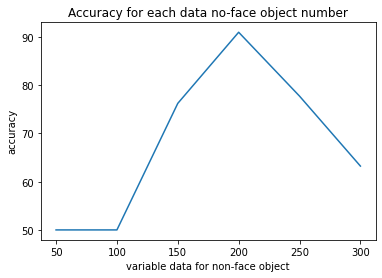

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import itertools
#at const face sample = 100
varData=[50,100,150,200,250,300]
acc=[50,50,76.25,91,77.75,63.24]
plt.plot(varData,acc)
plt.xlabel("variable data for non-face object")
plt.ylabel("accuracy")
plt.title("Accuracy for each data no-face object number")
plt.show()


In [ ]:
import numpy as np

np.log2(2)

1.0